In [19]:
# Profile A
profile = ['FCC', 'ARVN', 'YRTN', 'MCMN', 'NUNN', 'BULN', 'STLN', 'SMLN']
loc = [0, 275, 490, 550, 725, 875, 980, 1130]

# Profile B
profile = ['INUQ', 'CTSN', 'CRLN', 'SHMN', 'WAGN', 'KUGN', 'SMLN']
loc = [0, 491, 122, 54, 21, 350, 500, 147 ]
loc = [0, 491, 613, 688, 1038, 1538, 1685]

# Profile C
profile = ["ARVN", "YRTN", "MCMN", "JOSN", "SEDN", "QILN", "SRLN", "LAIN", "ILON", "GIFN", "MARN", "POIN"]
loc = [0, 290, 320, 360, 400, 1060, 1430, 1500, 1650, 1705, 1995, 2205]


In [20]:
import os
import pandas as pd
import numpy as np

#reading stations files
stationsfiles = []
for counter, i in enumerate(profile):
    txtfiles = [i for i in os.listdir(profile[counter]) if i.endswith(".csv")][0]
    stationsfiles.append( "/".join([profile[counter], txtfiles]))

#reading the data
numberofpoints = 6
depth = np.linspace(0, 50, numberofpoints)
profiledata = np.zeros((numberofpoints, len(stationsfiles)))

for counter, sta in enumerate(stationsfiles):
    df = pd.read_csv(sta)
    depthfromdf = df['thickn'].values.cumsum()/1000
    vs = df['vs'].values/1000
    vp = df['vp'].values/1000
    vs = np.round(vs, decimals=2)
    vp = np.round(vp, decimals=2)

    #rounding the values
    profiledata[:, counter] = np.interp(depth, depthfromdf, vs)
    

    



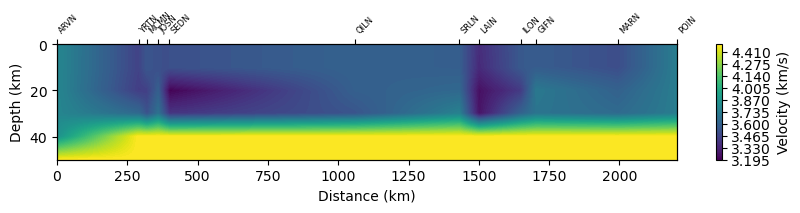

In [21]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create a grid for interpolation
grid_x, grid_y = np.meshgrid(np.linspace(min(loc), max(loc), 1000), depth)

# Flatten the loc and depth arrays for griddata
points = np.array([(x, y) for x in loc for y in depth])
values = profiledata.transpose().flatten()

# Interpolate the data
interpolated_data = griddata(points, values, (grid_x, grid_y), method='linear')

# Plot the interpolated data
fig, ax1 = plt.subplots(figsize=(10, 1.5))
contour = ax1.contourf(grid_x, grid_y, interpolated_data, levels=100, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax1, label='Velocity (km/s)')
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Depth (km)')
# ax1.set_title('Interpolated Profile Data')
ax1.invert_yaxis()

# Create a secondary x-axis on the top
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(loc)
ax2.set_xticklabels(profile, fontsize=6, rotation=45, ha='left')
# ax2.set_xlabel('Station')

plt.show()